In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

In [2]:
from sklearn.cross_validation import train_test_split
model = xgb.XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.05)

In [3]:
df = pd.read_csv("data/with_added_dummies.csv")

In [55]:
y = df["y"]
cols_to_remove_from_features = ["y", "campaign"]
X = df[[col for col in df.columns.tolist() if col not in cols_to_remove_from_features]]

In [56]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [9]:
from sklearn.metrics import accuracy_score, auc, recall_score, precision_score

In [57]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.05)
params = {"obj": "reg:logistic", "eta": 0.01, "max_depth": 8, "seed": 42, "silent": 1, 'eval_metric': 'auc'}#, 'scale_pos_weight' = sum_wneg/sum_wpos}
num_rounds = 500


dtrain = xgb.DMatrix(train_X, label=train_y)
dval = xgb.DMatrix(val_X, label=val_y)
watchlist  = [(dval,'eval'), (dtrain,'train')]
bst = xgb.train(params, dtrain, num_rounds, watchlist, early_stopping_rounds=10)
#gbdt = xgb.train(xgb_params, dtrain, num_rounds, early_stopping_rounds=10)

[0]	eval-auc:0.913395	train-auc:0.935004
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 10 rounds.
[1]	eval-auc:0.925844	train-auc:0.948979
[2]	eval-auc:0.925223	train-auc:0.948995
[3]	eval-auc:0.925638	train-auc:0.949219
[4]	eval-auc:0.925066	train-auc:0.949212
[5]	eval-auc:0.925493	train-auc:0.949902
[6]	eval-auc:0.925899	train-auc:0.950131
[7]	eval-auc:0.926015	train-auc:0.950262
[8]	eval-auc:0.926075	train-auc:0.950428
[9]	eval-auc:0.926244	train-auc:0.950539
[10]	eval-auc:0.926786	train-auc:0.951015
[11]	eval-auc:0.926749	train-auc:0.951109
[12]	eval-auc:0.926451	train-auc:0.951238
[13]	eval-auc:0.92655	train-auc:0.951403
[14]	eval-auc:0.93159	train-auc:0.954104
[15]	eval-auc:0.931597	train-auc:0.954302
[16]	eval-auc:0.931518	train-auc:0.95442
[17]	eval-auc:0.931691	train-auc:0.954816
[18]	eval-auc:0.931615	train-auc:0.954869
[19]	eval-auc:0.931862	train-auc:0.955102
[20]	eval-auc:0.932592	train-a

In [31]:
bst.get_fscore()

{'f0': 7294,
 'f1': 3785,
 'f10': 1539,
 'f11': 608,
 'f12': 217,
 'f13': 344,
 'f14': 290,
 'f15': 120,
 'f16': 138,
 'f17': 368,
 'f18': 70,
 'f19': 158,
 'f2': 554,
 'f20': 159,
 'f21': 107,
 'f22': 235,
 'f23': 281,
 'f24': 96,
 'f25': 137,
 'f26': 386,
 'f27': 166,
 'f28': 267,
 'f29': 69,
 'f3': 140,
 'f30': 61,
 'f31': 193,
 'f32': 160,
 'f33': 58,
 'f34': 244,
 'f35': 78,
 'f36': 69,
 'f37': 21,
 'f38': 281,
 'f39': 37,
 'f4': 3631,
 'f40': 275,
 'f41': 308,
 'f42': 166,
 'f43': 202,
 'f44': 68,
 'f45': 551,
 'f5': 370,
 'f6': 319,
 'f7': 1773,
 'f8': 6008,
 'f9': 1075}

In [58]:
dtest = xgb.DMatrix(test_X, label=test_y)
pred = bst.predict(dtest)

In [67]:
from sklearn.metrics import roc_curve, auc

In [68]:
fpr, tpr, thresholds = roc_curve(test_y, pred)

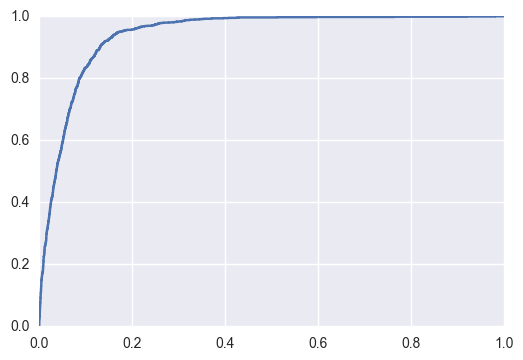

auc: 0.941662562393


In [69]:
plt.plot(fpr,tpr)
plt.show() 

model_auc = auc(fpr,tpr)
print "auc: {0}".format(model_auc) 